# Dev notebook for relative entropy components

### Class for performing the relative entropy updates

In [221]:
from relative_entropy_update import RelativeEntropyUpdate

In [227]:
Depletion

<class __main__.Depletion at 0x0000000005930C48>

**Here is an demo contrived potential**

In [24]:
depletion = Depletion()

In [54]:
depletion.SetParamsState({'rho_p': True, 'd_p': True, 'd': False, 'w': False})

In [55]:
params_val = {'rho_p': 6.0, 'd_p': 0.6, 'd': 1.0, 'w': 50.0}

In [56]:
relative_entropy_update = RelativeEntropyUpdate()

In [57]:
relative_entropy_update.LoadPotential(depletion, params_val)

In [58]:
relative_entropy_update.pot.params_state

{'d': False, 'd_p': True, 'rho_p': True, 'w': False}

In [59]:
relative_entropy_update.LoadRadialDistFuncs('./test_data/rdf_cluster.xvg', './test_data/rdf_crystal.xvg', spacing=0.02)

In [60]:
relative_entropy_update.CalcUpdate(learning_rate=0.1)

{'d': 1.0, 'd_p': -4.1961038652061804, 'rho_p': 5.8283819617851078, 'w': 50.0}

In [61]:
_dd_ps = relative_entropy_update.GetDerivative('d_p')
_dd_rho_ps = relative_entropy_update.GetDerivative('rho_p')
_rs = relative_entropy_update.r

In [195]:
weeks_chandler_anderson = WeeksChandlerAnderson()

In [196]:
weeks_chandler_anderson.SetParamsState({'d':True, 'epsilon': True, 'alpha': False, 'max_ur': True})

In [197]:
params_val = {'d': 1.0, 'epsilon': 1.0, 'alpha': 6, 'max_ur': float(1e6)}

In [198]:
relative_entropy_update = RelativeEntropyUpdate()

In [199]:
relative_entropy_update.LoadPotential(weeks_chandler_anderson, params_val)

In [200]:
relative_entropy_update.pot.params_state

{'alpha': False, 'd': True, 'epsilon': True, 'max_ur': True}

In [201]:
relative_entropy_update.LoadRadialDistFuncs('./test_data/rdf_cluster.xvg', './test_data/rdf_crystal.xvg', spacing=0.02)

In [203]:
relative_entropy_update.CalcUpdate(learning_rate=0.01)

{'alpha': 6,
 'd': 0.93595207833108895,
 'epsilon': 0.98410880352450747,
 'max_ur': 1000000.0}

In [137]:
_dalpha = relative_entropy_update.GetDerivative('alpha')
_depsilon = relative_entropy_update.GetDerivative('epsilon')
_rs = relative_entropy_update.r

In [2]:
class TestPotential:
    #load in any default parameters needed
    def __init__(self):
        self.num_params_opt = 3
        self.num_params_fixed = 0
        return None
        
    #this is the actual potential
    def Potential(self, r, params_opt, params_fixed):
        x1, x2, x3 = (params_opt[0], params_opt[1], params_opt[2])
        return (r*x1 - x2)**2.0 - r*x3
        
    def DefaultParameters(self):
        return (array([22.0, 3.3, -12.1]), array([]))

In [3]:
test_potential = TestPotential()

In [4]:
relative_entropy_update = RelativeEntropyUpdate()

In [5]:
relative_entropy_update.LoadPotential(test_potential, {'opt': [0.1, 2.0, 0.0], 'fixed':[]})

In [6]:
relative_entropy_update.pot

<__main__.TestPotential instance at 0x00000000062052C8>

In [7]:
print relative_entropy_update.params_opt

[0.1, 2.0, 0.0]


In [8]:
print relative_entropy_update.params_fixed

[]


In [9]:
relative_entropy_update.LoadRadialDistFuncs('./test_data/rdf_cluster.xvg', './test_data/rdf_crystal.xvg', spacing=0.02)

In [10]:
print relative_entropy_update.r

[ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46
  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7
  0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94
  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1   1.12  1.14  1.16  1.18
  1.2   1.22  1.24  1.26  1.28  1.3   1.32  1.34  1.36  1.38  1.4   1.42
  1.44  1.46  1.48  1.5   1.52  1.54  1.56  1.58  1.6   1.62  1.64  1.66
  1.68  1.7   1.72  1.74  1.76  1.78  1.8   1.82  1.84  1.86  1.88  1.9
  1.92  1.94  1.96  1.98  2.    2.02  2.04  2.06  2.08  2.1   2.12  2.14
  2.16  2.18  2.2   2.22  2.24  2.26  2.28  2.3   2.32  2.34  2.36  2.38
  2.4   2.42  2.44  2.46  2.48  2.5   2.52  2.54  2.56  2.58  2.6   2.62
  2.64  2.66  2.68  2.7   2.72  2.74  2.76  2.78  2.8   2.82  2.84  2.86
  2.88  2.9   2.92  2.94  2.96  2.98  3.    3.02  3.04  3.06  3.08  3.1
  3.12  3.14  3.16  3.18  3.2   3.22  3.24  3.26  3.28

In [11]:
for entry in relative_entropy_update.GetDerivatives():
    print entry

[  0.       -0.07992  -0.15968  -0.23928  -0.31872  -0.398    -0.47712
  -0.55608  -0.63488  -0.71352  -0.792    -0.87032  -0.94848  -1.02648
  -1.10432  -1.182    -1.25952  -1.33688  -1.41408  -1.49112  -1.568
  -1.64472  -1.72128  -1.79768  -1.87392  -1.95     -2.02592  -2.10168
  -2.17728  -2.25272  -2.328    -2.40312  -2.47808  -2.55288  -2.62752
  -2.702    -2.77632  -2.85048  -2.92448  -2.99832  -3.072    -3.14552
  -3.21888  -3.29208  -3.36512  -3.438    -3.51072  -3.58328  -3.65568
  -3.72792  -3.8      -3.87192  -3.94368  -4.01528  -4.08672  -4.158
  -4.22912  -4.30008  -4.37088  -4.44152  -4.512    -4.58232  -4.65248
  -4.72248  -4.79232  -4.862    -4.93152  -5.00088  -5.07008  -5.13912
  -5.208    -5.27672  -5.34528  -5.41368  -5.48192  -5.55     -5.61792
  -5.68568  -5.75328  -5.82072  -5.888    -5.95512  -6.02208  -6.08888
  -6.15552  -6.222    -6.28832  -6.35448  -6.42048  -6.48632  -6.552
  -6.61752  -6.68288  -6.74808  -6.81312  -6.878    -6.94272  -7.00728
  -7.07168  

In [12]:
relative_entropy_update.CalcUpdate(learning_rate=0.001)

{'fixed': [],
 'opt': [0.312187550652103, 1.9931914803569022, 0.0730389096300329]}

In [13]:
print relative_entropy_update.params_opt

[0.1, 2.0, 0.0]


### Program to actually perform the update

In [ ]:
from iter_sim_framework.relative_entropy_optimization import RelativeEntropyUpdate
import json

if __name__ == "__main__":
    #read some parameters in from the .xml file
    #potential_name
    #current_potential_parameters_filename
    #current rdf filename
    #target rdf filename
    #learning_rate
    #dim 
    
    #import the potential
    potential = __import__(('iter_sim_framework.potentials.%s' % potential_name))
    #import the potential parameters to optimize from
    with open('params.json', 'r') as infile:
        params = json.load(infile)
                  
    #establish a relative entropy update instance
    #params = {'opt': [0.1, 2.0, 0.0], 'fixed':[]}
    relative_entropy_update = RelativeEntropyUpdate()
    relative_entropy_update.LoadPotential(potential.Potential, params)
    relative_entropy_update.LoadRadialDistFuncs(filename_current, filename_target, spacing)
    params_out = relative_entropy_update.CalcUpdate(learning_rate, dim)
    
    #write out the new potential parameters
    with open('params_out.json', 'w') as outfile:
        json.dump(params_out, outfile)

In [265]:
dic0 = {'dic0':0}
dic1 = {'dic1':1}
ndic = dict(dic0.items() + dic1.items())
ndic

{'dic0': 0, 'dic1': 1}

In [266]:
dic0.items()

[('dic0', 0)]

In [276]:
from copy import deepcopy
x='A'
dict0 = {'rho_p': 0.1, 'd_p': 0.2, 'd': 1.0, 'w': 50.0}
param_name = 'd'
dict1 = deepcopy(dict0)
del dict1[param_name]
dict(dict1.items() + [(param_name, x)])


{'d': 'A', 'd_p': 0.2, 'rho_p': 0.1, 'w': 50.0}

In [ ]:
items
for key in dict0:
    

In [ ]:
nums

### Class for converting tabulated rdf data into a function and pickling

In [228]:
from numpy import array
from scipy.interpolate import Akima1DInterpolator as Akima
import re

class AkimaCreator:
    #dummy palaceholder for now
    def __init__(self):
        self.num_re = r'^\s*([0-9eE\+\-\.]+)[,;\s]+([0-9eE\+\-\.]+)\.*'
        return None
    
    #loads the rdf data and extracts the x and y
    def LoadData(self, filename):
        f = open(filename, 'r')
        data = f.readlines()
        x = []
        y = []
        for line in data:
            match = re.match(self.num_re, line)
            if match:
                x.append(float(match.group(1)))
                y.append(float(match.group(2)))
        f.close
        return (array(x), array(y))
    
    #load in the data and make an akima out of it
    def Create(self, filename):
        x, y = self.LoadData(filename)
        self.akima = Akima(x, y)
        return None
    
    #this is the actual akima function
    def Akima(self, x):
        x = array([x])
        return self.akima.__call__(x, nu=0, extrapolate=None)[0]

**Create and test the class**

In [229]:
akima_creator = AkimaCreator()

In [230]:
x, y = akima_creator.LoadData('./test_data/rdf_cluster.xvg')

In [231]:
akima_creator.Create('./test_data/rdf_cluster.xvg')

In [232]:
akima_creator.Akima(2.3)

2.2368100000000002

In [233]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numpy import arange

In [234]:
x_fit = arange(0.0, 4.0, 0.0001)
y_fit = [akima_creator.Akima(q) for q in x_fit]

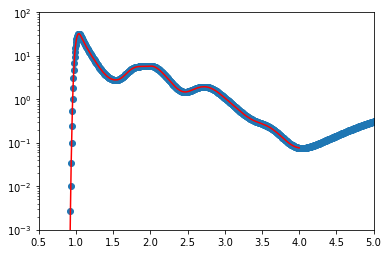

In [235]:
plt.scatter(x, y)
plt.plot(x_fit, y_fit, c='r')
plt.xlim(0.5, 5)
plt.ylim(0.001, 100)
plt.yscale('log')

In [ ]:
from numpy import array, arange
import numdifftools as nd
import scipy.integrate as integrate
from scipy.interpolate import Akima1DInterpolator as Akima

class RelativeEntropyUpdate:
    #nothing here yet
    def __init__(self):
        return None
    
    #load in a function that describes the interaction and current parameters ala {'opt':[], 'fixed':[]}
    def LoadPotential(self, pot, params)
        self.pot = pot
        self.params_opt = params['opt']
        self.params_fixed = params['fixed']
        return None
    
    #generator for the derivative functions in r-space for any potential
    def GetDerivatives(self):
    for i in range(len(self.params_opt)):
        x_cur = self.params_opt[i]
        dur = []
        for r in self.r:
            ur_ = lambda x: self.pot(r, (self.params_opt[0:i] + [x] + self.params_opt[i+1:]), self.params_fixed)
            dur_ = nd.Derivative(ur_)
            dur.append(dur_(x_cur))
        yield array(dur)
    
    #read in tabulated data
    def GetRadialDistData(self, filename):
        f = open(filename, 'r')
        data = f.readlines()
        r = []
        gr = []
        for line in data:
            match = re.match(self.num_re, line)
            if match:
                r.append(float(match.group(1)))
                gr.append(float(match.group(2)))
        f.close()
        return (1.0*array(r), 1.0*array(gr))
    
    #load the rdf from file and always make sure it is usable in case of user abuse
    def LoadRadialDistFuncs(self, filename_current, filename_target, integration_spacing=0.005):
        #read in the data
        r, gr = self.GetRadialDistData(filename_current)
        r_tgt, gr_tgt = self.GetRadialDistData(filename_target)
        #sample according to an akima spline fit
        r_lower, r_upper = (max(r[0], r_tgt[0]), min(r[-1], r_tgt[-1]))
        self.r = arange(r_lower, r_upper, spacing)
        akima = Akima(r, gr)
        self.gr = akima.__call__(self.r, nu=0, extrapolate=None)
        akima = Akima(r_tgt, gr_tgt)
        self.gr_tgt = akima.__call__(self.r, nu=0, extrapolate=None)        
        return None
    
    #calculate update
    def CalcUpdate(self, learning_rate=0.05, dim=3):
        param_updates = []
        for dur in GetDerivatives():
            update_integral = integrate.trapz(((self.r**(dim - 1))*(self.gr - self.gr_tgt)*dur), x=self.r)
            param_updates.append(learning_rate*update_integral)
        params_new = (array(self.params_opt) + array(param_updates)).tolist()
        return {'opt': params_new, 'fixed': self.params_fixed}

In [ ]:
def GetDerivatives(self):
    #iterate over parameters and calculate individual 
    for i in range(len(self.params_opt)):
        x_cur = self.params_opt[i]
        #iterate over r to build up the derivative to be integrated
        dur = []
        for r in self.r:
            ur_ = lambda x: self.pot(r, (params_opt[0:i] + [x] + params_opt[i+1:]), self.params_fixed)
            dur_ = nd.Derivative(ur_)
            dur.append(dur_(x_cur))
        yield array(dur)

In [257]:
from numpy import arange

In [259]:
arange(0.005, 97, 0.005)

array([  5.00000000e-03,   1.00000000e-02,   1.50000000e-02, ...,
         9.69850000e+01,   9.69900000e+01,   9.69950000e+01])

In [261]:
array([1,3,4,5])

array([1, 3, 4, 5])

In [239]:
def Thingy(X):
    return X[0] + 2.0*X[1] - X[2]**2.0

In [240]:
thingy_2 = lambda x: Thingy([2, x, 6])

In [241]:
thingy_2(3)

-28.0

In [242]:
[x]

[array([  0.00000000e+00,   5.00000000e-03,   1.00000000e-02, ...,
          2.33150000e+01,   2.33200000e+01,   2.33250000e+01])]

In [254]:
q = [3,4,0,2,7,4,1]
q = [3,7,2]
for i in range(len(q)):
    print (q[0:i] + ['x'] + q[i+1:])

['x', 7, 2]
[3, 'x', 2]
[3, 7, 'x']


In [256]:
(array([3,4,5]) + array([1,1,1])).tolist()

[4, 5, 6]

### Class for relative entropy update

In [ ]:
from numpy import array
import numdifftools as nd
import scipy.integrate as integrate

class RelativeEntropyUpdate:
    #nothing here yet
    def __init__(self):
        return None
    
    #load in a function that describes the interaction and current parameters ala {'opt':[], 'fixed':[]}
    def LoadPotential(self, pot, params)
        self.pot = pot
        self.params_opt = params['opt']
        self.params_fixed = params['fixed']
        return None
    
    #prepares the potential in a discrete format for integrating
    def PrepPotential(self):
        self.durs = []
        for r in self.r:
            ur_ = lambda params_opt: self.pot(r, params_opt, self.params_fixed)
            dur_ = nd.Gradient(ur_)
            self.durs.append(dur_(self.params_opt))
        self.durs = [array(dur) for dur in zip(*self.durs)]
        return None
    
    #load the rdf from file and map to an akima spline
    def LoadRadialDistFunc(self, filename, rdf_type):
        f = open(filename, 'r')
        data = f.readlines()
        self.r = []
        self.gr = []
        for line in data:
            match = re.match(self.num_re, line)
            if match:
                self.r.append(float(match.group(1)))
                self.gr.append(float(match.group(2)))
        if rdf_type == 'current':
            self.r = array(self.r)
            self.gr = array(self.gr)
        elif rdf_type == 'target':
            self.r = array(self.r)
            self.gr = array(self.gr)
        
        
        return None
    
    #calculate update
    def CalcUpdate(self, learning_rate=0.05, dim=3):
        self.PrepPotential(params)
        param_updates = []
        for dur in self.durs:
            update_integral = integrate.trapz(((self.r**dim)*self.gr*dur), x=self.r)
            param_updates.append(learning_rate*update_integral)
        param_updates = array(param_updates)    
        return {'opt': self.params_opt + param_updates, 'fixed': self.params_fixed}

**This is how a potential function should look like**

In [ ]:
class PotentialName:
    #load in any default parameters needed
    def __init__(self):
        #self.num_params_opt = ?
        #self.num_params_fixed = ?
        #return None
        
    #this is the actual potential
    def Potential(self, r, params_opt, params_fixed):
        #calculate stuff using functional form and the inputs
        #return potential at r
        
    def DefaultParameters(self):
        #generate defaults
        #return (params_opt, params_fixed)

In [ ]:
class TestPotential:
    #load in any default parameters needed
    def __init__(self):
        self.num_params_opt = 3
        self.num_params_fixed = 0
        return None
        
    #this is the actual potential
    def Potential(self, r, params_opt, params_fixed):
        x1, x2, x3 = (params_opt[0], params_opt[1], params_opt[2])
        return (r*x1 - x2)**2.0 - r*x3
        
    def DefaultParameters(self):
        return (array([22.0, 3.3, -12.1]), array([]))

In [9]:
from numpy import arange

**AO with electro**

In [4]:
from numpy import tanh, pi

class Depletion:
    #load in any default parameters needed
    def __init__(self):
        self.num_params = 4
        
    def SetParamsState(self, params_state):
        self.params_state = params_state
        if len(self.params_state) != self.num_params:
            raise AttributeError('Wrong number of parameters for depletion potential')
        return None
        
    #this is the actual potential
    def Potential(self, r, params_val):
        #load in the opt params
        rho_p = float(params_val['rho_p'])  #polymer concentration
        d_p = float(params_val['d_p'])      #polymer diameter
        d = float(params_val['d'])          #particle diameter
        w = float(params_val['w'])          #how fast to smooth the linearly extrapolated core region to zero
        #calculate the dimensionless potential (over k_B*T)
        if r < d:
            R_d = d/2.0 + d_p/2.0
            ur0 = -1.0*(rho_p/d**3)*((4.0*pi/3.0)*(R_d**3 - (3.0/4.0)*d*R_d**2 + (1.0/16.0)*d**3)) 
            dur0 = -1.0*(rho_p/d**3)*((4.0*pi/3.0)*(-1.0*(3.0/4.0)*R_d**2 + (3.0/16.0)*d**2)) 
            ur = ur0 + dur0*(r - d)
        elif d <= r and r < d + d_p:
            R_d = d/2.0 + d_p/2.0
            ur = -1.0*(rho_p/d**3)*((4.0*pi/3.0)*(R_d**3 - (3.0/4.0)*r*R_d**2 + (1.0/16.0)*r**3))    
        else:
            ur = 0.0
        #smooth
        ur = 0.5*(1.0 + tanh(w*(r - d)))*ur
        return ur
    
    #holds some user defined defaults that may be desirable
    def DefaultParameters(self):
        return ({'rho_p': True, 'd_p': True, 'd': False, 'w': False},
                {'rho_p': 0.1, 'd_p': 0.2, 'd': 1.0, 'w': 50.0})

In [46]:
depletion = Depletion({'rho_p': True, 'd_p': True, 'd': False, 'w': False})

In [47]:
rs = arange(0.0, 5.0, 0.001)

In [50]:
params = {'rho_p': 5.0, 'd_p': 0.6, 'd': 1.0, 'w': 50.0}
urs = depletion.Potential(rs, params)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [52]:
dd_ps = relative_entropy_update.GetDerivative('d_p')
dd_rho_ps = relative_entropy_update.GetDerivative('rho_p')

KeyError: 'd_p'

(-3, 2)

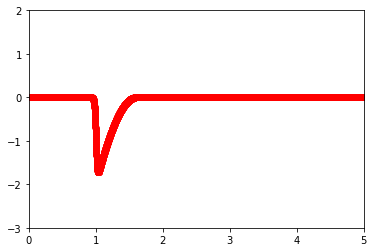

In [53]:
plt.scatter(rs, urs, c='r')
#plt.plot(_rs, _dd_ps, c='b')
#plt.plot(_rs, dd_rho_ps, c='g')
plt.xlim(0.0, 5)
plt.ylim(-3, 2)
#plt.yscale('log')

In [ ]:
from numpy import array

class WeeksChandlerAndersonFixed:
    #load in any default parameters needed
    def __init__(self):
        self.num_params_opt = 0
        self.num_params_fixed = 4
        return None
        
    #this is the actual potential
    def Potential(self, r, params_opt, params_fixed):
        #load in the opt params
        None
        #load in the fixed params
        d = params_fixed[0]                #particle diameter
        epsilon = params_fixed[1]          #how steep the wca repulsion should be
        alpha = params[2]
        max_ur = params_fixed[3]           #maximum value of the potential before leveling out
        #calculate the dimensionless potential (over k_B*T)
        if r < d:
            R_d = d/2.0 + d_p/2.0
            ur0 = -1.0*rho_p*((4.0*pi/3.0)*(R_d**3)*(1.0 - (3.0/4.0)*(d/R_d) + (1.0/16.0)*(d/R_d)**3)) 
            dur0 = -1.0*rho_p*((4.0*pi/3.0)*(R_d**3)*(-1.0*(3.0/4.0)*(1.0/R_d) + (3.0/16.0)*((d/R_d)**2)*(1.0/R_d))) 
            ur = ur0 + dur0*(r - d)
        elif d <= r and r < d + d_p:
            R_d = d/2.0 + d_p/2.0
            ur = -1.0*rho_p*((4.0*pi/3.0)*(R_d**3)*(1.0 - (3.0/4.0)*(r/R_d) + (1.0/16.0)*(r/R_d)**3))    
        else:
            ur = 0.0
        #smooth
        ur = 0.5*(1.0 + tanh(w*(r - d)))*ur
        return ur
    
    #holds some user defined defaults that may be desirable
    def DefaultParameters(self):
        return (array([0.02, 0.1]), array([1.0, 12.0]))

In [187]:
class WeeksChandlerAnderson:
    #load in any default parameters needed
    def __init__(self):
        self.num_params = 4
    
    #initialize the state
    def SetParamsState(self, params_state):
        self.params_state = params_state
        if len(self.params_state) != self.num_params:
            raise AttributeError('Wrong number of parameters for weeks chandler anderson potential')
        return None
        
    #this is the actual potential
    def Potential(self, r, params_val):
        #load in the opt params
        d = float(params_val['d'])                   #particle diameter
        epsilon = float(params_val['epsilon'])       #how steep the wca repulsion should be
        alpha = float(params_val['alpha'])           #the exponent for the wca interaction
        max_ur = float(params_val['max_ur'])         #maximum value of the potential before leveling out
        #calculate the dimensionless potential (over k_B*T)
        alpha = max(0.001, alpha)
        if r <= d*(2.0**(1.0/alpha)):
            r = max(0.0001, r)
            ur = 4.0*epsilon*((d/r)**(2*alpha) - (d/r)**(alpha)) + epsilon
            if ur >= max_ur:
                ur = max_ur
        else:
            ur = 0.0
        return ur
    
    #holds some user defined defaults that may be desirable
    def DefaultParameters(self):
        return ({'d': False, 'epsilon': True, 'alpha': True, 'max_ur': False},
                {'d': 1.0, 'epsilon': 1.0, 'alpha': 6, 'max_ur': float(1e6)})

In [70]:
weeks_chandler_anderson = WeeksChandlerAnderson()

In [71]:
weeks_chandler_anderson.SetParamsState({'d': False, 'epsilon': True, 'alpha': True, 'max_ur': False})

In [72]:
rs = arange(0.0, 5.0, 0.001)

In [73]:
param_vals = {'d': 1.0, 'epsilon': 1.0, 'alpha': 2, 'max_ur': float(1e6)}
urs = [weeks_chandler_anderson.Potential(r, param_vals) for r in rs]

In [74]:
urs

[1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 973486.74912360904,
 891475.08707087254,
 817915.94157097558,
 751785.33641975292,
 692201.12971826771,
 638401.0,
 589724.20260698802,
 545596.39231819601,
 505516.95016831049,
 469048.36367724743,
 435807.29738405865,
 405457.05997501046,
 377701.22947136872,
 352278.24200141092,
 328956.78500962356,
 307531.86419753096,
 287821.43647619517,
 269663.51985607255,
 252913.70637945467,
 237443.0166015625,
 223136.04429116621,
 209889.34838070994,
 197610.0

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline 

(-7, 20)

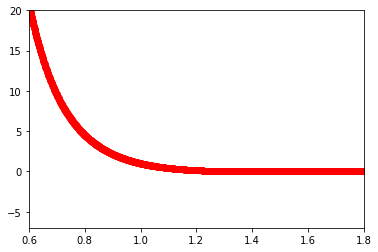

In [78]:
plt.scatter(rs, urs, c='r')
#plt.plot(_rs, _dalpha, c='b')
#plt.plot(_rs, _depsilon, c='g')
plt.xlim(0.6, 1.8)
plt.ylim(-7, 20)
#plt.yscale('log')

In [ ]:
_dalpha = relative_entropy_update.GetDerivative('alpha')
_depsilon = relative_entropy_update.GetDerivative('epsilon')
_rs = relative_entropy_update.r

In [363]:
import importlib

In [364]:
my_module2 = importlib.import_module('potentials.depletion')

In [366]:
my_module2.Potential()._

AttributeError: Potential instance has no attribute '_'

**Wrapper for potentials**

In [1]:
import sys

In [2]:
sys.path.insert(0,'../')

In [3]:
from potentials import potential_combiner

In [4]:
combined_potential = potential_combiner.Potential({'wca': 'weeks_chandler_anderson',
                                                   'dep': 'depletion',
                                                   'elec': 'electrostatic_dlvo'})

In [5]:
combined_potential.SetParamsState(
{'wca__d': {'opt': False}, 
'wca__epsilon': {'opt': True, 'min': 0.2}, 
'wca__alpha': {'opt': False}, 
'wca__max_ur': {'opt': False}, 
'dep__rho_p': {'opt': True, 'min': 0.0, 'max': 9.0}, 
'dep__d_p': {'opt': True, 'min': 0.0, 'max': 1.0}, 
'dep__d': {'opt': False}, 
'dep__w': {'opt': False}, 
'elec__A': {'opt': True, 'min': 0.0},
'elec__z': {'opt': True, 'min': 0.0, 'max': 6.0}}
)

In [6]:
from numpy import arange

In [7]:
rs = arange(0.0, 5.0, 0.0001)
rs

array([  0.00000000e+00,   1.00000000e-04,   2.00000000e-04, ...,
         4.99970000e+00,   4.99980000e+00,   4.99990000e+00])

In [8]:
params_val = {'wca__d': 1.0, 'wca__epsilon': 1.0, 'wca__alpha': 6.0, 'wca__max_ur': float(1e6), 
              'dep__rho_p': 6.0, 'dep__d_p': 0.6, 'dep__d': 1.0, 'dep__w': 50.0, 
              'elec__A': 1.0, 'elec__z': 2.0}

urs = combined_potential.Potential(rs, params_val)
urs
#urs = [combined_potential.Potential(r, params_val) for r in rs]

array([  1.09999950e+06,   1.00999950e+06,   1.00499950e+06, ...,
         1.64204477e-02,   1.64192983e-02,   1.64181490e-02])

In [9]:
combined_potential.potentials

{'dep': <potentials.depletion.Potential instance at 0x0000000005F9FC88>,
 'elec': <potentials.electrostatic_dlvo.Potential instance at 0x0000000005F9FC08>,
 'wca': <potentials.weeks_chandler_anderson.Potential instance at 0x0000000005A50088>}

In [10]:
combined_potential.params_state

{'dep__d': {'opt': False},
 'dep__d_p': {'max': 1.0, 'min': 0.0, 'opt': True},
 'dep__rho_p': {'max': 9.0, 'min': 0.0, 'opt': True},
 'dep__w': {'opt': False},
 'elec__A': {'min': 0.0, 'opt': True},
 'elec__z': {'max': 6.0, 'min': 0.0, 'opt': True},
 'wca__alpha': {'opt': False},
 'wca__d': {'opt': False},
 'wca__epsilon': {'min': 0.2, 'opt': True},
 'wca__max_ur': {'opt': False}}

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

(-3, 10)

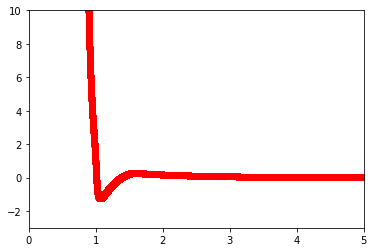

In [12]:
plt.scatter(rs, urs, c='r')
plt.xlim(0.0, 5)
plt.ylim(-3, 10)

In [13]:
from relative_entropy_update import RelativeEntropyUpdate

In [14]:
relative_entropy_update = RelativeEntropyUpdate()

In [15]:
relative_entropy_update.LoadPotential(combined_potential, params_val)

In [16]:
relative_entropy_update.params_val

{'dep__d': 1.0,
 'dep__d_p': 0.6,
 'dep__rho_p': 6.0,
 'dep__w': 50.0,
 'elec__A': 1.0,
 'elec__z': 2.0,
 'wca__alpha': 6.0,
 'wca__d': 1.0,
 'wca__epsilon': 1.0,
 'wca__max_ur': 1000000.0}

In [17]:
relative_entropy_update.LoadRadialDistFuncs('./test_data/rdf_cluster.xvg', './test_data/rdf_crystal.xvg', spacing=0.005)

In [23]:
relative_entropy_update.CalcUpdate(learning_rate=0.002)

({'dep__d': 1.0,
  'dep__d_p': 0.50409156874437766,
  'dep__rho_p': 5.9965676468619442,
  'dep__w': 50.0,
  'elec__A': 1.0101369861543954,
  'elec__z': 2.0027515288032403,
  'wca__alpha': 6.0,
  'wca__d': 1.0,
  'wca__epsilon': 0.99682694283174711,
  'wca__max_ur': 1000000.0},
 48.297530798223058)

In [24]:
relative_entropy_update.CalcUpdate(learning_rate=0.01)

({'dep__d': 1.0,
  'dep__d_p': 0.12045784372188811,
  'dep__rho_p': 5.9828382343097228,
  'dep__w': 50.0,
  'elec__A': 1.050684930771977,
  'elec__z': 2.0137576440162013,
  'wca__alpha': 6.0,
  'wca__d': 1.0,
  'wca__epsilon': 0.98413471415873577,
  'wca__max_ur': 1000000.0},
 48.297530798223079)

In [70]:
wca = WeeksChandlerAnderson({'d': False, 'epsilon': True, 'alpha': True, 'max_ur': False})

In [71]:
rs = arange(0.0, 5.0, 0.001)

In [92]:
params = {'d': 1.0, 'epsilon': 1.0, 'alpha': 12, 'max_ur': float(1e6)}
urs = wca.Potential(rs, params)

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline 

(-0.001, 5)

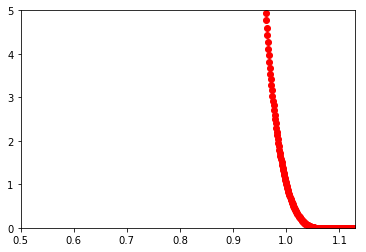

In [97]:
plt.scatter(rs, urs, c='r')
#plt.plot(_rs, _dd_ps, c='b')
#plt.plot(_rs, dd_rho_ps, c='g')
plt.xlim(0.5, 1.130)
plt.ylim(-0.001, 5)
#plt.yscale('log')

In [120]:
def TestFunc(x, a):
    return a*x**2

In [121]:
import numdifftools as nd

In [122]:
x = array([2,5,2.3,0.0,1.2])
func = lambda a: TestFunc(x, a)

In [123]:
func(3)

array([ 12.  ,  75.  ,  15.87,   0.  ,   4.32])

In [124]:
dfunc = nd.Derivative(func)

In [125]:
dfunc(3)

array([  4.  ,  25.  ,   5.29,   0.  ,   1.44])

In [27]:
akima = Akima([0,1,2,3,4,5,6,7,8], [0,1,4,2,2,2,4,7,8])

In [35]:
akima.__call__(20, extrapolate=True)*2

976.00000000000068

In [22]:
from scipy.interpolate import Akima1DInterpolator as Akima
from numpy import cumsum

#class for defining an akima spline with regard to increments between points
class AkimaCumulative:
    #load in the initial 
    def __init__(self, x, dy):
        self.x = x
        self.y = cumsum(dy[::-1])[::-1]
        self.akima = Akima(self.x, self.y)
        return None
    
    #evaluates the akima at specified x values
    def __call__(self, x, nu=0, extrapolate=None):
        return self.akima.__call__(x, nu=nu, extrapolate=extrapolate)

In [2]:
from numpy import array

In [3]:
akima_cumulative = AkimaCumulative([1,2,3,4,5,6], [10,8,6,4,2,0])

In [4]:
akima_cumulative.y

array([30, 20, 12,  6,  2,  0])

In [5]:
akima_cumulative.__call__([5.2,4.3])

array([ 1.44,  4.59])

In [92]:
set({'0.001':3,'0.002':4}.keys())

{'0.001', '0.002'}

In [93]:
float('0.034')

0.034

In [94]:
splines = Splines()

In [96]:
splines.SetParamsState({'0.020': True, 
                        '0.010': True, 
                        '0.015': True, 
                        '0.005': True})

In [97]:
splines.map_dict

{'0.005': 0, '0.010': 1, '0.015': 2, '0.020': 3}

In [98]:
splines.param_vals_array

array([ 0.,  0.,  0.,  0.])

In [99]:
splines.param_names_array

array([ 0.005,  0.01 ,  0.015,  0.02 ])

In [105]:
splines.Potential(array([0.0051, 0.019]), 
                        {'0.020': 0.0, 
                         '0.010': 1.0, 
                         '0.015': 2.0, 
                         '0.005': 3.0})

array([ 5.92026933,  0.47466667])

In [107]:
print splines.param_vals_array
print splines.param_names_array

[ 3.  1.  2.  0.]
[ 0.005  0.01   0.015  0.02 ]


In [1]:
import sys

In [2]:
sys.path.insert(0,'../')

In [3]:
from potentials import potential_combiner

In [4]:
combined_potential = potential_combiner.Potential([('ac', 'akima_cumulative')])

In [5]:
combined_potential.SetParamsState({'ac__0.020': True, 
                                 'ac__0.010': True, 
                                 'ac__0.015': True, 
                                 'ac__0.005': True})

In [6]:
from numpy import arange

In [7]:
rs = arange(0.0, 5.0, 0.0001)

In [24]:
params_val = {'ac__0.020': 0.0, 
            'ac__0.010': 1.0, 
            'ac__0.015': 2.0, 
            'ac__0.005': 3.0}

urs = combined_potential.Potential(rs, params_val)
print zip(rs,urs)[:1000]

[(0.0, 9.0), (0.0001, 8.9399999999999995), (0.00020000000000000001, 8.8800000000000008), (0.00030000000000000003, 8.8200000000000003), (0.00040000000000000002, 8.7599999999999998), (0.00050000000000000001, 8.6999999999999993), (0.00060000000000000006, 8.6400000000000006), (0.00069999999999999999, 8.5800000000000001), (0.00080000000000000004, 8.5199999999999996), (0.00090000000000000008, 8.4600000000000009), (0.001, 8.4000000000000004), (0.0011000000000000001, 8.3399999999999999), (0.0012000000000000001, 8.2799999999999994), (0.0013000000000000002, 8.2200000000000006), (0.0014, 8.1600000000000001), (0.0015, 8.0999999999999996), (0.0016000000000000001, 8.0399999999999991), (0.0017000000000000001, 7.9800000000000004), (0.0018000000000000002, 7.9199999999999999), (0.0019, 7.8600000000000003), (0.002, 7.7999999999999998), (0.0021000000000000003, 7.7400000000000002), (0.0022000000000000001, 7.6799999999999997), (0.0023, 7.6200000000000001), (0.0024000000000000002, 7.5599999999999996), (0.002

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

(0, 10)

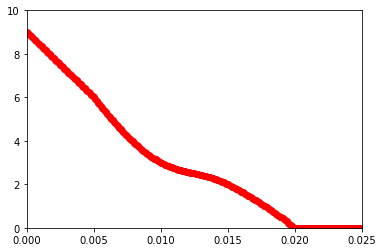

In [22]:
plt.scatter(rs, urs, c='r')
#plt.plot(_rs, _dd_ps, c='b')
#plt.plot(_rs, dd_rho_ps, c='g')
plt.xlim(0, 0.025)
plt.ylim(0, 10)

In [28]:
set({'hello':987, 'ksdjk':90}.keys())

{'hello', 'ksdjk'}

In [94]:
from importlib import import_module
import re

class PotentialCombiner:
    #load in a list of potentials (names)
    def __init__(self, potential_specs):
        #make sure no whitespace
        potential_specs = [(potential_id_name.strip(), potential_type.strip()) 
                           for potential_id_name, potential_type in potential_specs]
        #initial checks on data
        self.potential_id_names = zip(*potential_specs)[0]
        for potential_id_name in self.potential_id_names:
            if re.search(r'\_', potential_id_name):
                raise AttributeError('Cannot have underscores in potential id name')
        if len(set(self.potential_id_names)) != len(self.potential_id_names):
            raise AttributeError('Each potential id name must be unique')
        else:
            self.potential_id_names = set(self.potential_id_names)
        #load in the modules
        self.potentials = {}   
        import_potential = lambda x: import_module(x)
        for potential_id_name, potential_type in potential_specs:
            self.potentials[potential_id_name] = import_potential(('potentials.' + potential_type)).Potential() 
        return None
    
    #separates the parameters for funneling to individual potentials
    def Separate(self, params):
        params_separated = {}
        for param in params:
            potential_id_name = self.param_map[param]['potential_id_name']
            potential_param = self.param_map[param]['potential_param']
            if potential_id_name not in params_separated:
                params_separated[potential_id_name] = {}
            params_separated[potential_id_name][potential_param] = params[param]
        return params_separated
        
    #initialize the state
    def SetParamsState(self, params_state):
        self.params_state = params_state
        #go through and create a hash mapping to the individual potential to use now and later
        self.param_map = {}
        for param in params_state:
            match = re.match(r'\s*([a-z0-9]+)\_\_([^\s]+)', param)
            potential_id_name = match.group(1)
            potential_param = match.group(2)
            if potential_id_name in self.potential_id_names:
                self.param_map[param] = {'potential_id_name': potential_id_name, 'potential_param': potential_param}
            else:
                raise AttributeError('Potential id name not found in initial names provided.')
        #map to the individual potentials
        params_state_separated = self.Separate(params_state)
        for potential_id_name in params_state_separated:
            self.potentials[potential_id_name].SetParamsState(params_state_separated[potential_id_name])
        return None
    
    #this is the actual potential
    def Potential(self, r, params_val):
        #compute potential
        params_val_separated = self.Separate(params_val)
        ur = 0.0    
        for potential_id_name in self.potentials:
            ur = ur + self.potentials[potential_id_name].Potential(r, params_val_separated[potential_id_name])
        return ur

In [95]:
potential_combiner = PotentialCombiner([('ac', 'akima_cumulative'), ('dep', 'depletion')])

In [106]:
potential_combiner.SetParamsState({'ac__0.020': True, 
                                 'ac__0.010': True, 
                                 'ac__0.015': True, 
                                 'ac__0.005': True,
                                   'dep__rho_p': True,
                                   'dep__d_p': True, 
                                   'dep__d': False, 
                                   'dep__w': False})

In [107]:
potential_combiner.param_map

{'ac__0.005': {'potential_id_name': 'ac', 'potential_param': '0.005'},
 'ac__0.010': {'potential_id_name': 'ac', 'potential_param': '0.010'},
 'ac__0.015': {'potential_id_name': 'ac', 'potential_param': '0.015'},
 'ac__0.020': {'potential_id_name': 'ac', 'potential_param': '0.020'},
 'dep__d': {'potential_id_name': 'dep', 'potential_param': 'd'},
 'dep__d_p': {'potential_id_name': 'dep', 'potential_param': 'd_p'},
 'dep__rho_p': {'potential_id_name': 'dep', 'potential_param': 'rho_p'},
 'dep__w': {'potential_id_name': 'dep', 'potential_param': 'w'}}

In [108]:
potential_combiner.potentials['ac'].params_state

{'0.005': True, '0.010': True, '0.015': True, '0.020': True}

In [115]:
potential_combiner.potentials['dep'].params_state

{'d': False, 'd_p': True, 'rho_p': True, 'w': False}

In [110]:
from numpy import arange

In [111]:
rs = arange(0.0, 5.0, 0.0001)

In [112]:
params_val = {'ac__0.020': 0.0, 
               'ac__0.010': 2.0, 
               'ac__0.015': 1.0, 
            'ac__0.005': 3.0,
               'dep__rho_p': 1.3,
                'dep__d_p': 0.5, 
                 'dep__d': 1.0, 
                  'dep__w': 25.0}

urs = potential_combiner.Potential(rs, params_val)
print urs

[ nan  nan  nan ...,  nan  nan  nan]


In [113]:
print urs[:500]

[             nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan   6.00000000e+00   5.93020000e+00
   5.86080000e+00   5.79180000e+00   5.72320000e+00   5.65500000e+00
   5.58720000e+00   5.51980000e+00

In [ ]:
{'wca__d': {'potential_id_name': 'wca', 'param_name': 'd'}}